In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio

In [2]:
train_imgs = glob('./dataset/train_img/*.tif')
test_imgs = glob('./dataset/test_img/*.tif')
train_masks = glob('./dataset/train_mask/*.tif')

In [3]:
import pandas as pd
pd.read_csv('./dataset/train_meta.csv').shape

(33575, 2)

### Additional Infos

In [6]:
mask.sum().sum()

4

In [10]:
data = rasterio.open(train_imgs[20])
data.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 10, 'crs': CRS.from_epsg(32635), 'transform': Affine(30.0, 0.0, 464385.0,
       0.0, -30.0, -3541005.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [8]:
data.bounds

BoundingBox(left=464385.0, bottom=-3548685.0, right=472065.0, top=-3541005.0)

In [9]:
data.lnglat()

(26.663454750705686, -32.03933318033548)

In [10]:
data.res

(30.0, 30.0)

### channel by channel

In [332]:
img_num = 14

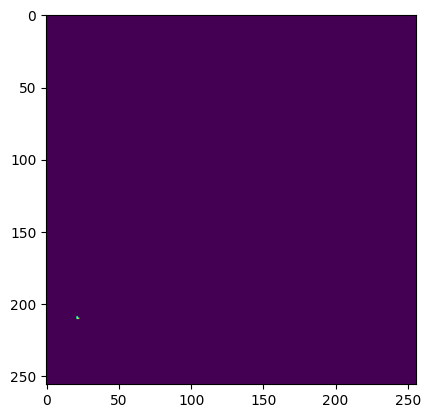

In [333]:
mask = rasterio.open(train_masks[img_num]).read().transpose(1,2,0)
plt.imshow(mask)

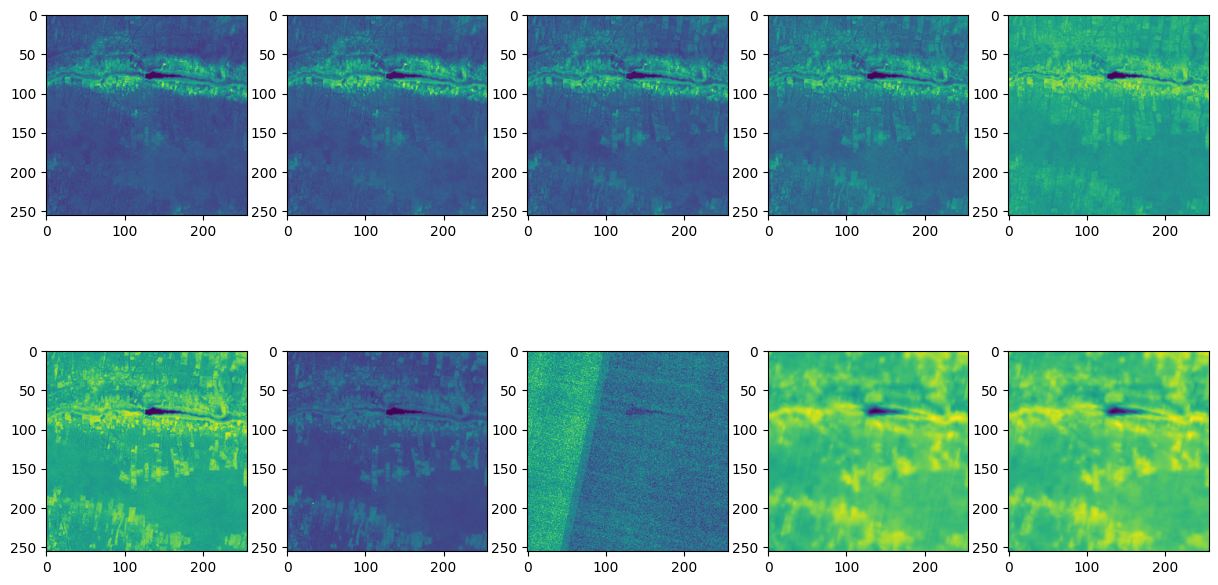

In [334]:
img = rasterio.open(test_imgs[img_num]).read().transpose(1,2,0)
img_8 = img/(2**16)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j])

In [349]:
min_pix = float('inf')
for i in range(20):
    img = rasterio.open(train_imgs[i]).read().transpose(1,2,0)
    img_8 = img/(2**16)
    mask = rasterio.open(train_masks[i]).read().transpose(1,2,0)
    
    m = np.ma.masked_where(mask[:,:,0]==0, img_8[:,:,6])
    cur_min = np.ma.compressed(m).min()
    min_pix = min(min_pix, cur_min)
    print(i,np.median( img_8[:,:,6].flatten()))
    
    print(i,cur_min)
print(min_pix)

0 0.161376953125
0 0.352447509765625
1 0.201934814453125
1 0.3278656005859375
2 0.137725830078125
2 0.3140716552734375
3 0.12176513671875
3 0.2750396728515625
4 0.1217498779296875
4 0.50830078125
5 0.2820587158203125
5 0.643463134765625
6 0.13433837890625
6 0.3990020751953125
7 0.13299560546875
7 0.4040985107421875
8 0.13299560546875
8 0.38616943359375
9 0.1442718505859375
9 0.2397613525390625
10 0.187103271484375
10 0.3064727783203125
11 0.12469482421875
11 0.347381591796875
12 0.1512908935546875
12 0.563873291015625
13 0.0
13 0.6905975341796875
14 0.255462646484375
14 0.5497589111328125
15 0.0995330810546875
15 0.5465850830078125
16 0.1331634521484375
16 0.20269775390625
17 0.104705810546875
17 0.6735076904296875
18 0.1361236572265625
18 0.3336181640625
19 0.1639404296875
19 0.3046722412109375
0.20269775390625


0.3140716552734375
0.137725830078125
0.13270210707560182


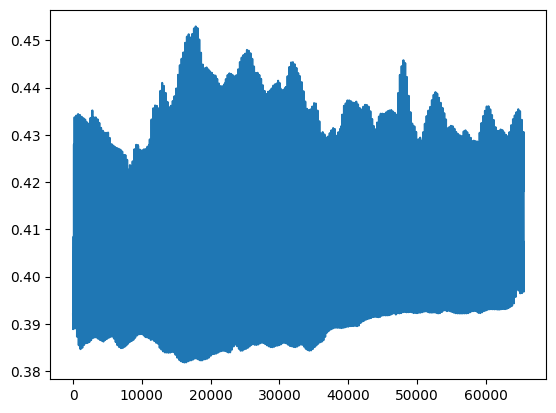

In [346]:
img_num=2
img = rasterio.open(train_imgs[img_num]).read().transpose(1,2,0)
mask = rasterio.open(train_masks[img_num]).read().transpose(1,2,0)
img_8 = img/(2**16)

m = np.ma.masked_where(mask[:,:,0]==0, img_8[:,:,6])
cur_min = np.ma.compressed(m).min()
print(cur_min)
print(np.median(img_8[:,:,6].flatten()))
print(np.mean(img_8[:,:,6].flatten()))

plt.plot(img_8[:,:,-2].flatten())

In [324]:
m = np.ma.masked_where(mask[:,:,0]==0, img_8[:,:,-2])
print(np.ma.compressed(m))

[0.4239502  0.42427063 0.42323303]


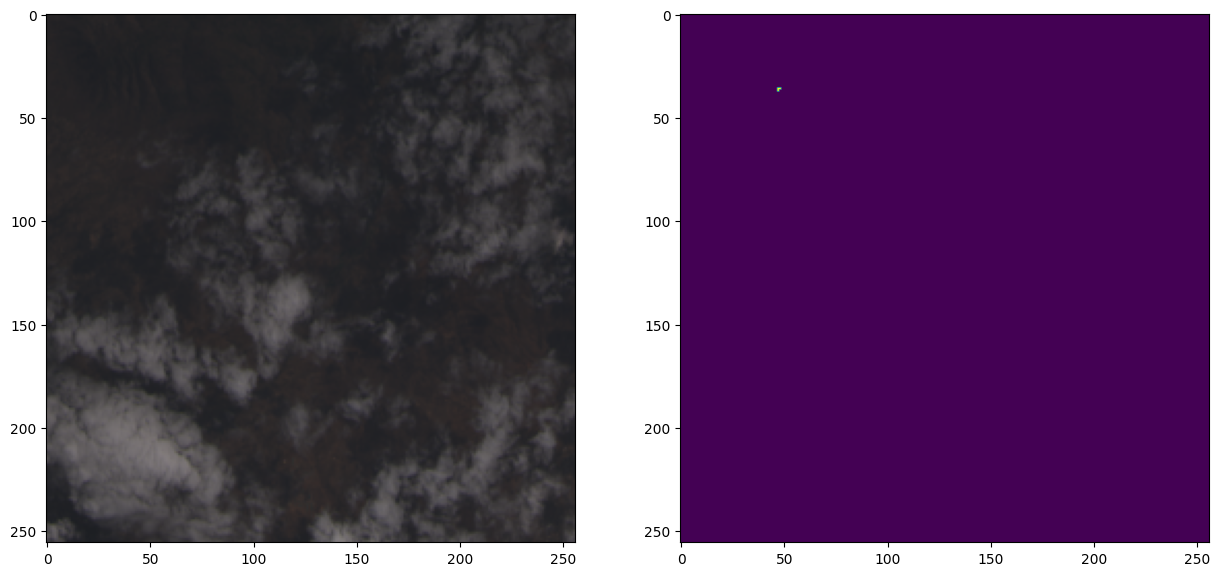

In [316]:
#rgb
rgb = [3,2,1]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,rgb])
axs[1].imshow(mask)

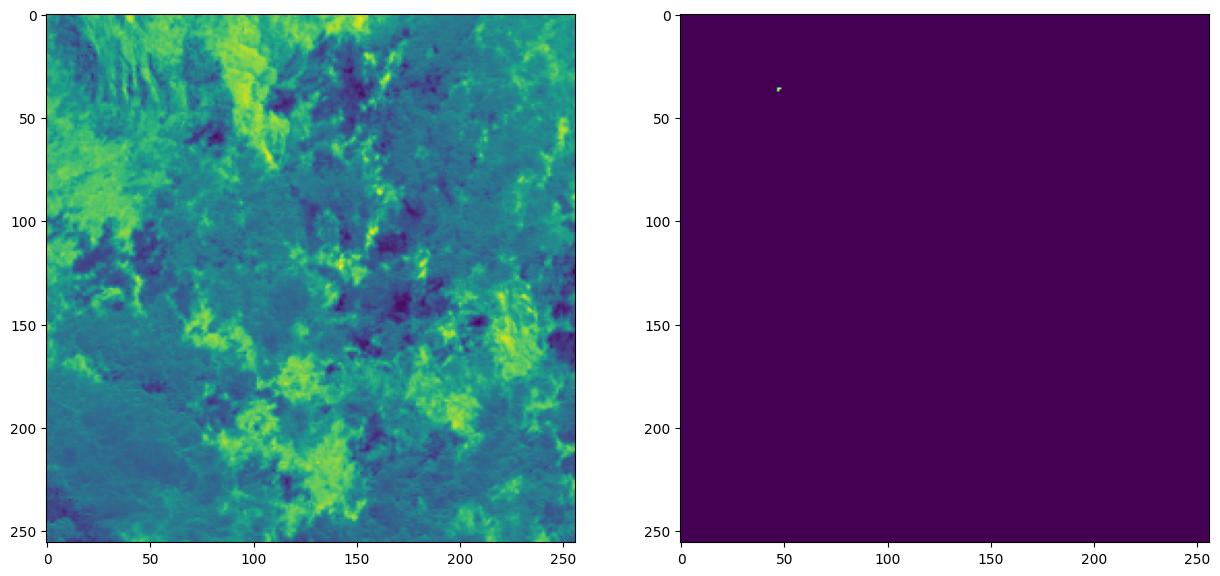

In [317]:
# NDVI
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(NDVI)
axs[1].imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


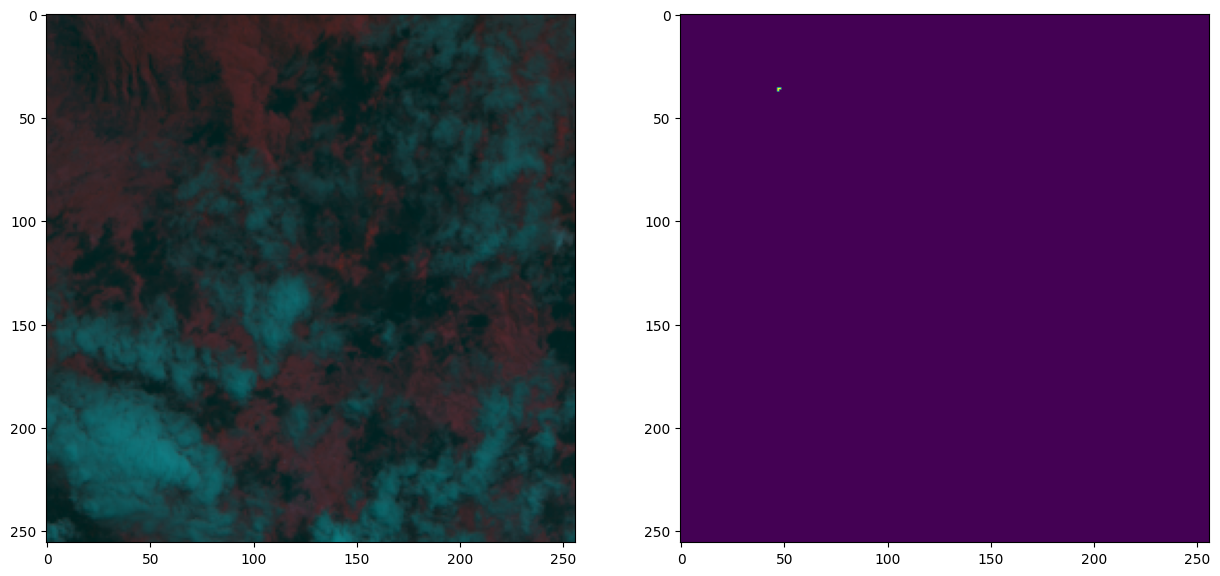

In [318]:
# NDVI, G B
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
G = img_8[:,:,2]
B = img_8[:,:,3]
ndvigb = np.stack([NDVI,G,B],axis=2)

fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

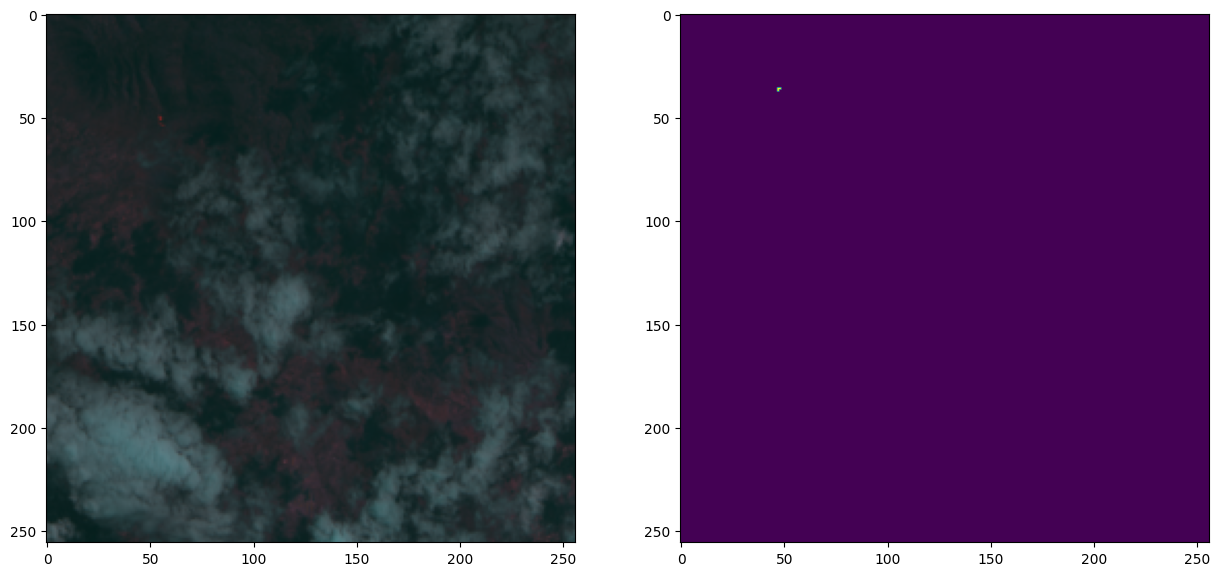

In [319]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,6]-img_8[:,:,7])
c2 = img_8[:,:,2]
c3 = img_8[:,:,3]

# c3 = np.zeros((256,256))
# c3 = NDVI

ndvigb = np.stack([c1,c2,c3],axis=2)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

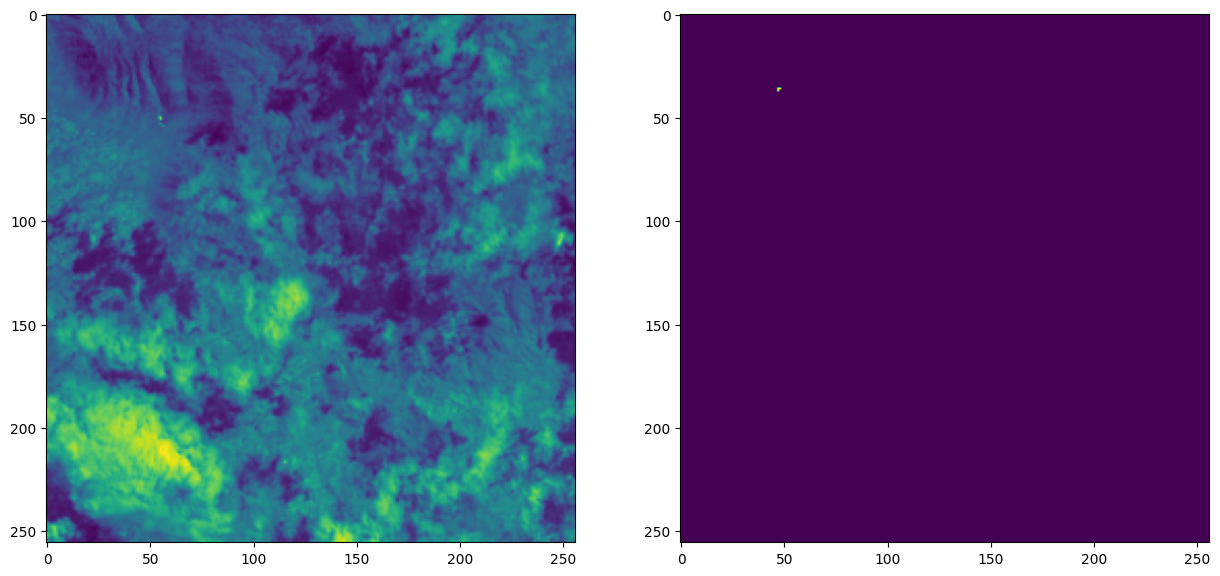

In [320]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,5]+img_8[:,:,6])

axs[0].imshow(c1)
axs[1].imshow(mask)

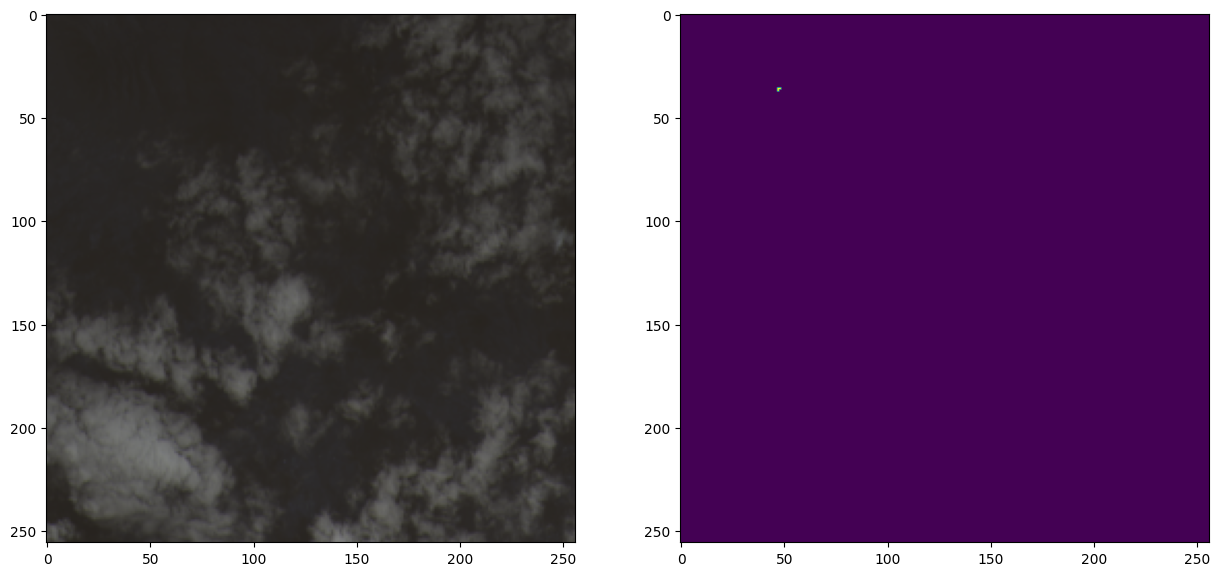

In [321]:
agr=[0,1,2]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

axs[0].imshow(img_8[:,:,agr])
axs[1].imshow(mask)

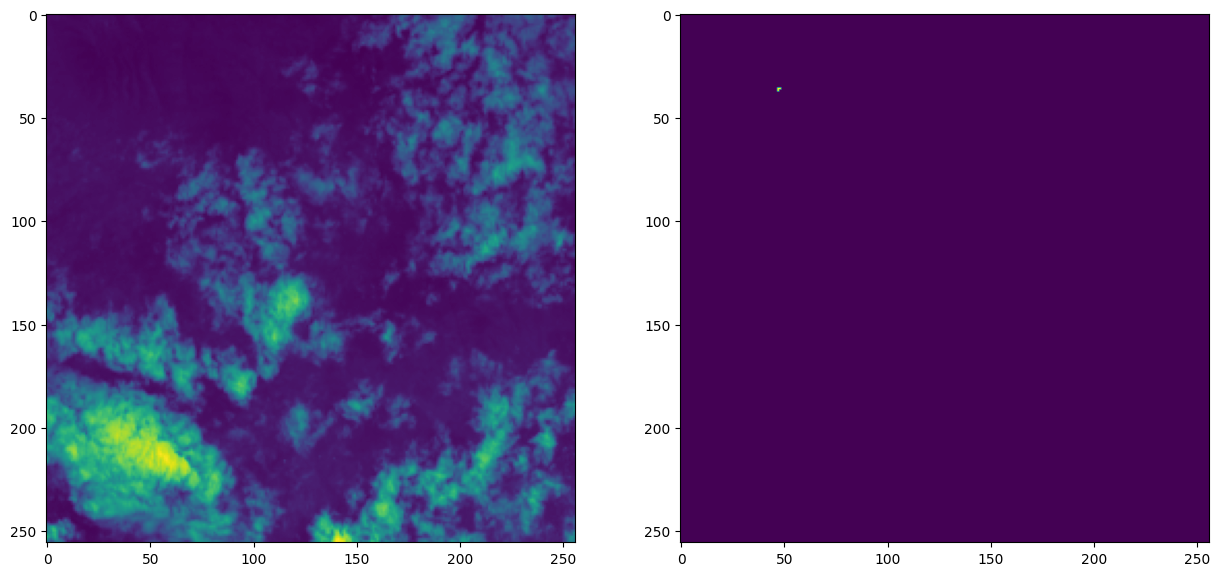

In [322]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,0])
axs[1].imshow(mask)